Question:

In [14]:
print(titanic_data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


      Age
0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
..    ...
886  27.0
887  19.0
888   NaN
889  26.0
890  32.0

[891 rows x 1 columns]
        Fare
0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
..       ...
886  13.0000
887  30.0000
888  23.4500
889  30.0000
890   7.7500

[891 rows x 1 columns]


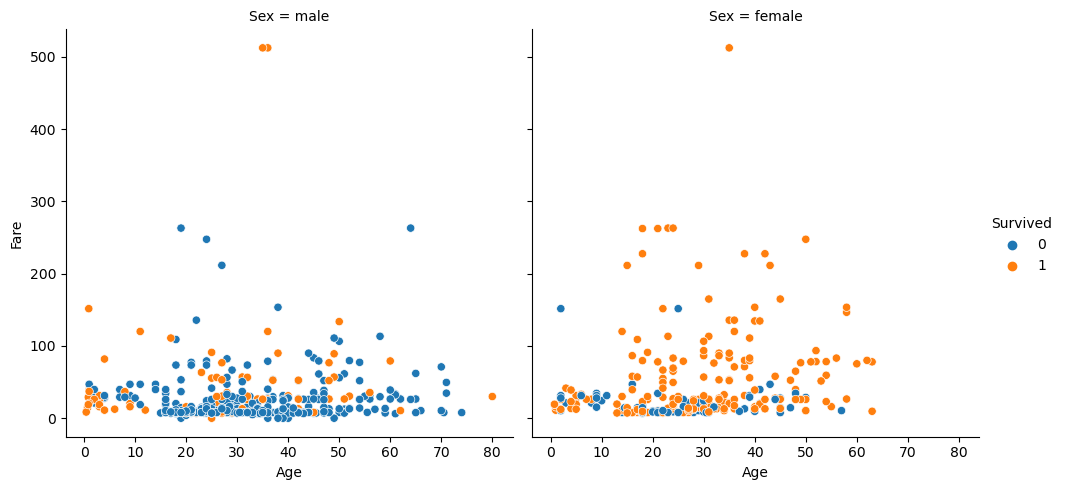

In [49]:

import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

titanic_data_filename = 'titanic.csv'
titanic_data = pd.read_csv(titanic_data_filename)
df = titanic_data
titanic_data.head()

X = titanic_data[['Age']]
y = titanic_data[['Fare']]
print (X)
print (y)
g = sns.relplot(data=titanic_data, x="Age", y="Fare", col="Sex", hue="Survived")
g.set_axis_labels("Age", "Fare")

In [30]:
titanic_data.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [50]:
print ("Number of samples")
len(titanic_data)

Number of samples


891

In [36]:
sample = titanic_data.iloc[7]
print (sample)

PassengerId                                 8
Survived                                    0
Pclass                                      3
Name           Palsson, Master. Gosta Leonard
Sex                                      male
Age                                       2.0
SibSp                                       3
Parch                                       1
Ticket                                 349909
Fare                                   21.075
Cabin                                     NaN
Embarked                                    S
Name: 7, dtype: object


In [56]:
queenstown_passengers = df[df["Embarked"] == "Q"]

In [55]:
queenstown_passengers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
790,791,0,3,"Keane, Mr. Andrew ""Andy""",male,NaN,0,0,12460,7.7500,NaN,Q
825,826,0,3,"Flynn, Mr. John",male,NaN,0,0,368323,6.9500,NaN,Q
828,829,1,3,"McCormack, Mr. Thomas Joseph",male,NaN,0,0,367228,7.7500,NaN,Q
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
